In [1]:
import os,sys,inspect
sys.path.insert(0,"..")  # Adds the repo to the path.
from datasets.XRay import JointDataset as XRayDataset
import json
import medpy
import collections
import numpy as np
import h5py
import ntpath
import matplotlib.pyplot as plt

In [106]:
d_train = XRayDataset(
      d1data="/lustre04/scratch/cohenjos/NIH/images-224",                    
      d1csv="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv",
      d2data="/lustre04/scratch/cohenjos/PC/images-224",
      d2csv="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv",
      ratio=0.5,                                                                
      mode="train",
      seed=1234)
d_valid = XRayDataset(
      d1data="/lustre04/scratch/cohenjos/NIH/images-224",                    
      d1csv="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv",
      d2data="/lustre04/scratch/cohenjos/PC/images-224",
      d2csv="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv",
      ratio=0.5,                                                                
      mode="valid",
      seed=1234)
d_test = XRayDataset(
      d1data="/lustre04/scratch/cohenjos/NIH/images-224",                    
      d1csv="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv",
      d2data="/lustre04/scratch/cohenjos/PC/images-224",
      d2csv="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv",
      ratio=0.5,                                                                
      mode="test",
      seed=1234)

/home/jdv/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


n_per_category=307
TRAIN: neg=306, pos=306
VALID: neg=152, pos=152
TEST: neg=156, pos=156
n_per_category=307
TRAIN: neg=306, pos=306
VALID: neg=152, pos=152
TEST: neg=156, pos=156
n_per_category=307
TRAIN: neg=306, pos=306
VALID: neg=152, pos=152
TEST: neg=156, pos=156


class=0


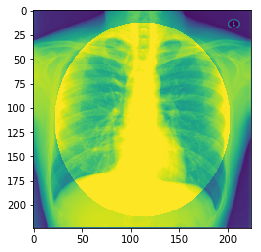

In [91]:
e = d_train[1]
img = e[0][0][0]
seg = e[0][1][0]
c = e[1]
print('class={}'.format(c))
plt.imshow(img + (seg*500), vmin=-1024, vmax=1024)


In [107]:
mins = []
maxs = []
classes = []

for e in d_train: 
    mins.append(np.min(e[0][0][0]))
    maxs.append(np.max(e[0][0][0]))
    classes.append(e[1])

(array([578.,   7.,   6.,   9.,   3.,   3.,   4.,   0.,   1.,   1.]),
 array([-1024.     , -1005.52783,  -987.05566,  -968.58356,  -950.1114 ,
         -931.6392 ,  -913.16705,  -894.6949 ,  -876.2228 ,  -857.7506 ,
         -839.27844], dtype=float32),
 <a list of 10 Patch objects>)

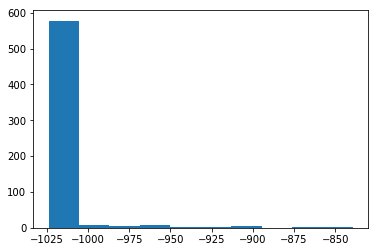

In [27]:
plt.hist(mins)

(array([  3.,   6.,   3.,   1.,   4.,  11.,  24.,  40.,  90., 430.]),
 array([ 188.7373 ,  272.26358,  355.78986,  439.3161 ,  522.8424 ,
         606.36865,  689.8949 ,  773.4212 ,  856.94745,  940.47375,
        1024.     ], dtype=float32),
 <a list of 10 Patch objects>)

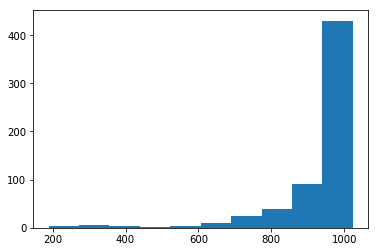

In [28]:
plt.hist(maxs)

(array([306.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 306.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

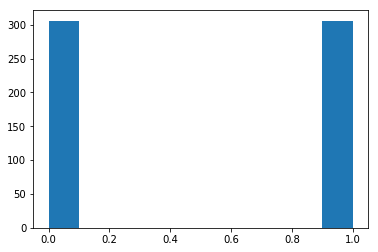

In [108]:
plt.hist(classes)

In [109]:
def get_label_images(d):

    site_0 = np.where(d.labels == 0)[0]
    site_1 = np.where(d.labels == 1)[0]

    img_0 = np.zeros((224, 224))
    img_1 = np.zeros((224, 224))

    for i in site_0:
        e = d[i]
        img_0 += e[0][0][0].astype(np.int64)
    
    for i in site_1:
        e = d[i]
        img_1 += e[0][0][0].astype(np.int64)
    
    return (img_0, img_1)

In [110]:
train_0, train_1 = get_label_images(d_train)
valid_0, valid_1 = get_label_images(d_valid)
test_0, test_1 = get_label_images(d_test)

Text(0.5, 1.0, 'valid label 1')

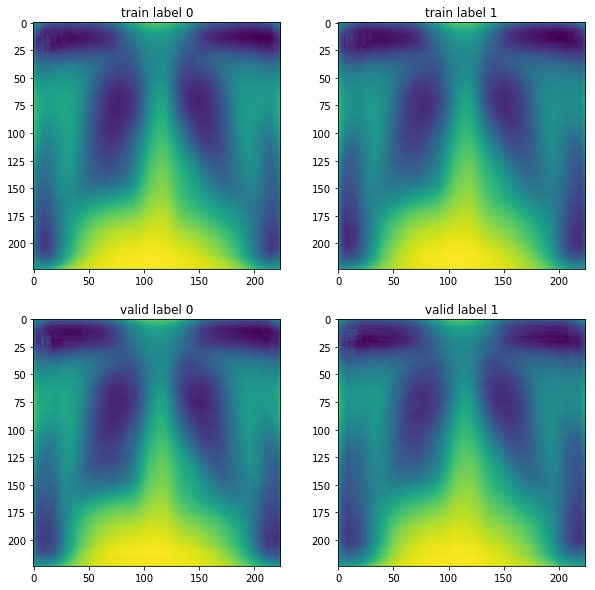

In [111]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2)

ax1.imshow(train_0)
ax1.set_title('train label 0')
ax2.imshow(train_1)
ax2.set_title('train label 1')
ax3.imshow(valid_0)
ax3.set_title('valid label 0')
ax4.imshow(valid_1)
ax4.set_title('valid label 1')